In [0]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Confidence Intervals

Purpose of a Confidence Interval: Is to express the **precision** with which we are estimating a sample statistic.

![Precision vs Bias](https://www.researchgate.net/profile/Antonio_Martinez14/publication/267154260/figure/fig1/AS:392165269229588@1470510894947/Illustration-of-the-concepts-of-bias-accuracy-and-precision.png)

Bias: Centered around the truth or not?

Precision: How tightly clustered are our estimates around the truth (spread out)

Ways to Express a confidence Interval:

- Lower Bound, Mean, Upper Bound

or

- Mean, Margin of Error

In [0]:
def mean_moe(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy Arrays are your friend
  sample = np.array(sample)
  # What is my estimate  - the mean
  mean = np.mean(sample)
  # Sample Size
  n = len(sample)
  # standard error
  # stderr = stats.sem(data)
  # I want the sample standard deviation
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  # Look up the t-statistic that contains 95% of possible sample means
  # within its bounds
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  # Margin Of Error
  margin_of_error = t * stderr
  return mean, margin_of_error

In [0]:
def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy Arrays are your friend
  sample = np.array(sample)
  # What is my estimate  - the mean
  mean = np.mean(sample)
  # Sample Size
  n = len(sample)
  # standard error
  # stderr = stats.sem(data)
  # I want the sample standard deviation
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  # Look up the t-statistic that contains 95% of possible sample means
  # within its bounds
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  # Margin Of Error
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error

I can build a confidence interval around any sample mean.

To calculate a mean, I need a variable that is numeric and ordinal.

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
# Numeric, categorical, discrete, ordinal
df['education-num'].value_counts().sort_index()

1        51
2       168
3       333
4       646
5       514
6       933
7      1175
8       433
9     10501
10     7291
11     1382
12     1067
13     5355
14     1723
15      576
16      413
Name: education-num, dtype: int64

In [0]:
# categorical, discrete
# I can't take a mean of this variable
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [0]:
# Lets build a confidence interval around... age

sample1 = df['age'].sample(10)

sample2 = df['age'].sample(10)

In [0]:
confidence_interval(sample1)

(16.330998203655035, 37.5, 58.669001796344965)

In [0]:
confidence_interval(sample2)

(25.596980961852967, 34.3, 43.00301903814703)

In [0]:
mean_moe(sample1)

(37.5, 10.016415941712488)

In [0]:
mean_moe(sample2)

(34.3, 8.70301903814703)

In [0]:
# Population Mean
df['age'].mean()

38.58164675532078

#Two ways to express a confidence interval 

- Calculate the confidence intervals
  - lower, mean, upper
  - mean, moe
- Plot the confidence intervals
  - lower, mean, upper
  - mean, moe

We have different samples, from the sample population, but they have different sample means and confidence intervals.

In [0]:
CI1 = confidence_interval(sample1)
CI2 = confidence_interval(sample2)

### Method 1 of plotting a Confidence Interval

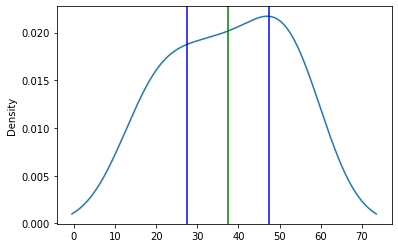

In [0]:
# Plot the confidence interval around sample 1
sample1.plot.density()
plt.axvline(CI1[0], color='blue')
plt.axvline(CI1[1], color='green')
plt.axvline(CI1[2], color='blue')
plt.show()

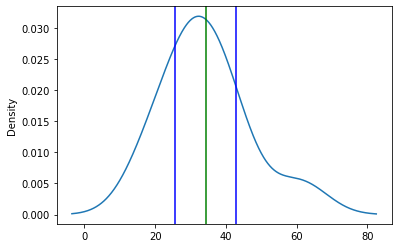

In [0]:
sample2.plot.density()
plt.axvline(CI2[0], color='blue')
plt.axvline(CI2[1], color='green')
plt.axvline(CI2[2], color='blue')
plt.show()

### Method 2 of plotting a confidence interval

In [0]:
mean_moe(sample1)

(37.5, 10.016415941712488)

In [0]:
mean_moe(sample2)

(34.3, 8.70301903814703)

In [0]:
m_moe1 = mean_moe(sample1)
m_moe2 = mean_moe(sample2)

list_of_tuples = [m_moe1, m_moe2]

df = pd.DataFrame(list_of_tuples)

df.head()

,0,1
0,37.5,10.016416
1,34.3,8.703019


In [0]:
df.columns = ['mean', 'margin of error']

df.head()

,mean,margin of error
0,37.5,10.016416
1,34.3,8.703019


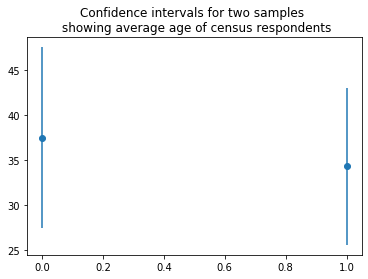

In [0]:
plt.errorbar(x=range(0,2), y=df['mean'], yerr=df['margin of error'], fmt='o')

plt.title('Confidence intervals for two samples \n showing average age of census respondents')
plt.show()



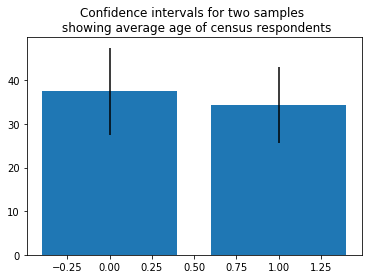

In [0]:
plt.bar(x=range(0,2), height=df['mean'], yerr=df['margin of error'])

plt.title('Confidence intervals for two samples \n showing average age of census respondents')
plt.show()

In [0]:
# Filter based on this to only remove NaNs in a specific column
np.isnan([1, 2, 3, np.NaN, 4, 5, np.NaN])

array([False, False, False,  True, False, False,  True])

In [0]:
# Grab the file from UCI
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-18 22:46:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-02-18 22:46:47 (285 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [0]:
# Load Data
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# Replace '?' with np.NaN, 'n' with 0, and 'y' with 1
df = df.replace({'?':np.NaN, 'n':0, 'y':1})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
df.dtypes

party                    object
handicapped-infants     float64
water-project           float64
budget                  float64
physician-fee-freeze    float64
el-salvador-aid         float64
religious-groups        float64
anti-satellite-ban      float64
aid-to-contras          float64
mx-missile              float64
immigration             float64
synfuels                float64
education               float64
right-to-sue            float64
crime                   float64
duty-free               float64
south-africa            float64
dtype: object

In [0]:
df = df.drop('party', axis=1)

In [0]:
# calculated confidence interval for every column in my dataset
confidence_intervals = []

for column in df:
  col = df[column]
  # Clean NaNs out of individual columns
  col_cleaned = col[~np.isnan(df[column])]
  confidence_intervals.append(mean_moe(col_cleaned))

confidence_intervals

[(0.44208037825059104, 0.04751991516694433),
 (0.5038759689922481, 0.050035155875612004),
 (0.5966981132075472, 0.04688293235393027),
 (0.41745283018867924, 0.047129362079716804),
 (0.5047619047619047, 0.048011766382389104),
 (0.6415094339622641, 0.04583135502795108),
 (0.5676959619952494, 0.04751484274308076),
 (0.5761904761904761, 0.04745322907363392),
 (0.5012106537530266, 0.04842235267960681),
 (0.5046728971962616, 0.04755737973054505),
 (0.36231884057971014, 0.046493783747855816),
 (0.42326732673267325, 0.04838340913118599),
 (0.5097560975609756, 0.04859155634990683),
 (0.5933014354066986, 0.04728424009147262),
 (0.4275184275184275, 0.0482658357856493),
 (0.8126888217522659, 0.04225040037768932)]

In [0]:
confidence_intervals_df = pd.DataFrame(confidence_intervals)
confidence_intervals_df.columns = ['mean', 'moe']

confidence_intervals_df.head()

,mean,moe
0,0.442080,0.047520
1,0.503876,0.050035
2,0.596698,0.046883
3,0.417453,0.047129
4,0.504762,0.048012


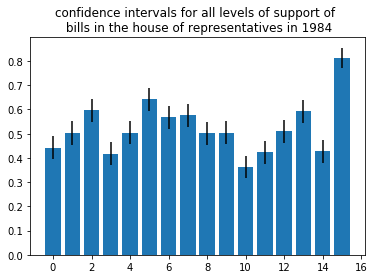

In [0]:
plt.bar(x=range(0,len(confidence_intervals_df)), height=confidence_intervals_df['mean'], yerr=confidence_intervals_df['moe'])
plt.title('confidence intervals for all levels of support of \n bills in the house of representatives in 1984')
plt.show()

In [0]:
# df['handicapped=infants']

## Confidence Interval Equation:

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

$\bar{x}$ is the sample mean

$t$ is the t-statistic that corresponds to our degrees of freedom (n-1) and the confidence level that we're using to build our confidence interval (95%)

s is the **sample** standard deviation 
 - with numpy we do `np.std(sample, ddof=1)`
 - with pandas we don't have to pass the extra parameter df['column].std()

n is the sample size `len(sample)`

In [0]:
confidence_intervals = []

for column in df:
  col = df[column]
  # Clean NaNs out of individual columns
  col_cleaned = col[~np.isnan(df[column])]
  confidence_intervals.append(confidence_interval(col_cleaned))

confidence_intervals_df = pd.DataFrame(confidence_intervals)
confidence_intervals_df.columns = ['lower', 'mean', 'upper']

confidence_intervals_df.head()

,lower,mean,upper
0,0.394560,0.442080,0.489600
1,0.453841,0.503876,0.553911
2,0.549815,0.596698,0.643581
3,0.370323,0.417453,0.464582
4,0.456750,0.504762,0.552774


In [0]:
confidence_intervals_df['moe'] = confidence_intervals_df['upper'] - confidence_intervals_df['mean']

confidence_intervals_df.head()

,lower,mean,upper,moe
0,0.394560,0.442080,0.489600,0.047520
1,0.453841,0.503876,0.553911,0.050035
2,0.549815,0.596698,0.643581,0.046883
3,0.370323,0.417453,0.464582,0.047129
4,0.456750,0.504762,0.552774,0.048012


## The '~' unary operator

Flips boolean values, False -> True, and True -> False

In [0]:
my_list = [True, False, False, True, True]

np.array(my_list)

array([ True, False, False,  True,  True])

In [0]:
# Unary operator
~np.array(my_list)

array([False,  True,  True, False, False])